In [295]:
import numpy as np
import matplotlib.pyplot as plt
import midynet
import graphinf
import seaborn as sb
import networkx as nx

import pandas as pd

In [296]:
metrics = [
    nx.core_number,
    lambda _g: dict(nx.degree(_g)),
    nx.eigenvector_centrality,
    nx.closeness_centrality,
    nx.clustering,
    nx.pagerank,
]
metrics_names = [
    "k-core",
    "degree",
    "eigen",
    "closeness",
    "clustering",
    "pagerank",
]

In [297]:
from sklearn.feature_selection import mutual_info_regression, r_regression, f_regression

In [298]:
J = np.linspace(0, 1, 50)
num_samples = 50
df = None
# score["coupling"] = J
G = graphinf.random_graph.ErdosRenyiModel(100, 250, with_parallel_edges=False, with_self_loops=False)
for j in J:
    print(j)
    X = graphinf.data_model.dynamics.GlauberDynamics(graph_prior=G, length=100, coupling=j)
    x, y = None, None
    
    for _ in range(num_samples):
        X.sample()
        g = nx.from_numpy_array(np.array(X.get_graph().get_adjacency_matrix()))
        ts = np.array(X.get_past_states())
        if y is None:
            y = ts.mean(-1)
        else:
            y = np.concatenate([y, ts.mean(-1)])
        _x = np.array([list(m(g).values()) for m in metrics]).T
        if x is None:
            x = _x * 1
        else:
            x = np.concatenate([x, _x], axis=0)
    scores = {k: [v] for k, v in zip(metrics_names, mutual_info_regression(x, y))}
    if df is None:
        df = pd.DataFrame(scores)
    else:
        df = pd.concat([df, pd.DataFrame.from_dict(scores)])
#     print(df)
# plt.plot(J, score)
    

0.0
0.02040816326530612
0.04081632653061224
0.061224489795918366
0.08163265306122448
0.1020408163265306
0.12244897959183673
0.14285714285714285
0.16326530612244897
0.18367346938775508
0.2040816326530612
0.22448979591836732
0.24489795918367346
0.26530612244897955
0.2857142857142857
0.3061224489795918
0.32653061224489793
0.3469387755102041
0.36734693877551017
0.3877551020408163
0.4081632653061224
0.42857142857142855
0.44897959183673464
0.4693877551020408
0.4897959183673469
0.5102040816326531
0.5306122448979591
0.5510204081632653
0.5714285714285714
0.5918367346938775
0.6122448979591836
0.6326530612244897
0.6530612244897959
0.673469387755102
0.6938775510204082
0.7142857142857142
0.7346938775510203
0.7551020408163265
0.7755102040816326
0.7959183673469387
0.8163265306122448
0.836734693877551
0.8571428571428571
0.8775510204081632
0.8979591836734693
0.9183673469387754
0.9387755102040816
0.9591836734693877
0.9795918367346939
1.0


In [299]:
df["coupling"] = J

Text(0, 0.5, 'Mutual info. between network prop. and <x>')

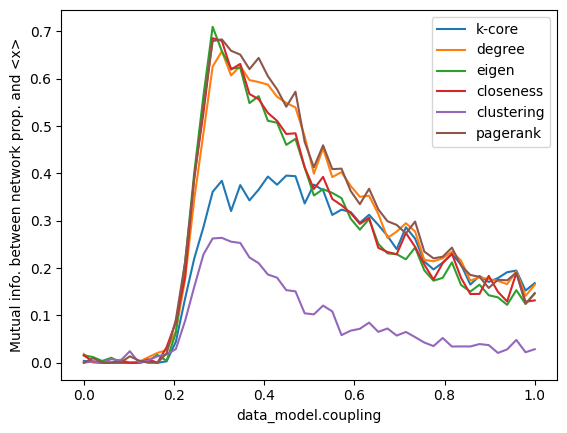

In [300]:
for n in metrics_names:
    sb.lineplot(df, x="coupling", y=n, label=n)
plt.xlabel("data_model.coupling")
plt.ylabel("Mutual info. between network prop. and <x>")
# plt.savefig("pred-heuristics.png")

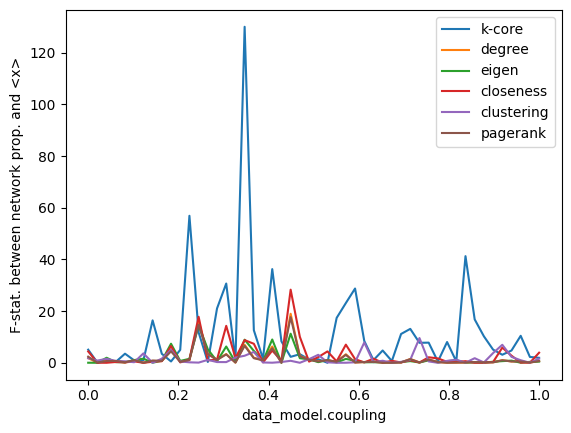

In [185]:
for n in metrics_names:
    sb.lineplot(df, x="coupling", y=n, label=n)
plt.xlabel("data_model.coupling")
plt.ylabel("F-stat. between network prop. and <x>")
plt.savefig("pred-heuristics.png")

In [302]:
from sklearn.feature_selection import r_regression, chi2, f_classif, mutual_info_classif

from collections import defaultdict

In [303]:
score = []
J = np.linspace(0, 2, 40)
num_samples = 10
G = graphinf.random_graph.ErdosRenyiModel(100, 250, with_parallel_edges=False, with_self_loops=False)
# scores = {}
for j in J:
    X = graphinf.data_model.dynamics.GlauberDynamics(graph_prior=G, length=100, coupling=j)
    mi = defaultdict(list)
    c2 = defaultdict(list)
    f = defaultdict(list)
    r = defaultdict(list)
    mi["coupling"] = [j]* num_samples
    c2["coupling"] = [j]* num_samples
    f["coupling"] = [j]* num_samples
    r["coupling"] = [j]* num_samples
    
    for _ in range(num_samples):
        X.sample()
        adj = np.array(X.get_graph().get_adjacency_matrix())
        g = nx.from_numpy_array(adj)
        ts = np.array(X.get_past_states())
        y = ts[:, -1]
        x = np.array([list(m(g).values()) for m in metrics]).T
        
        for m, func in zip(
            [c2, mi, f, r], 
            [
                lambda x, y: chi2(x, y)[0], 
                mutual_info_classif, 
                lambda x, y: f_classif(x, y)[0],
                lambda x, y: r_regression(x, y)
            ]
        ):
            for k, v in zip(metrics_names, func(x, y)):
                m[k].append(v)
    for k, s in zip(["c2", "mi", "f", "r"], [c2, mi, f, f]):
        
        if k not in scores:
            scores[k] = pd.DataFrame(s)
        else:
            scores[k] = pd.concat([scores[k], pd.DataFrame(s)], ignore_index=True)
    print(j)
    

0.0
0.05128205128205128
0.10256410256410256
0.15384615384615385
0.20512820512820512
0.2564102564102564
0.3076923076923077
0.358974358974359
0.41025641025641024
0.4615384615384615
0.5128205128205128
0.5641025641025641


/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


0.6153846153846154
0.6666666666666666
0.717948717948718
0.7692307692307692


/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning

0.8205128205128205
0.8717948717948718


/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning

0.923076923076923
0.9743589743589743


/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning

1.0256410256410255
1.0769230769230769


/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning

1.1282051282051282
1.1794871794871795


/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning

1.2307692307692308
1.282051282051282


/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning

1.3333333333333333
1.3846153846153846


/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning

1.435897435897436
1.4871794871794872


/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning

1.5384615384615383
1.5897435897435896


/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning

1.641025641025641
1.6923076923076923


/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning

1.7435897435897436
1.7948717948717947


/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning

1.846153846153846
1.8974358974358974


/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning

1.9487179487179487
2.0


/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


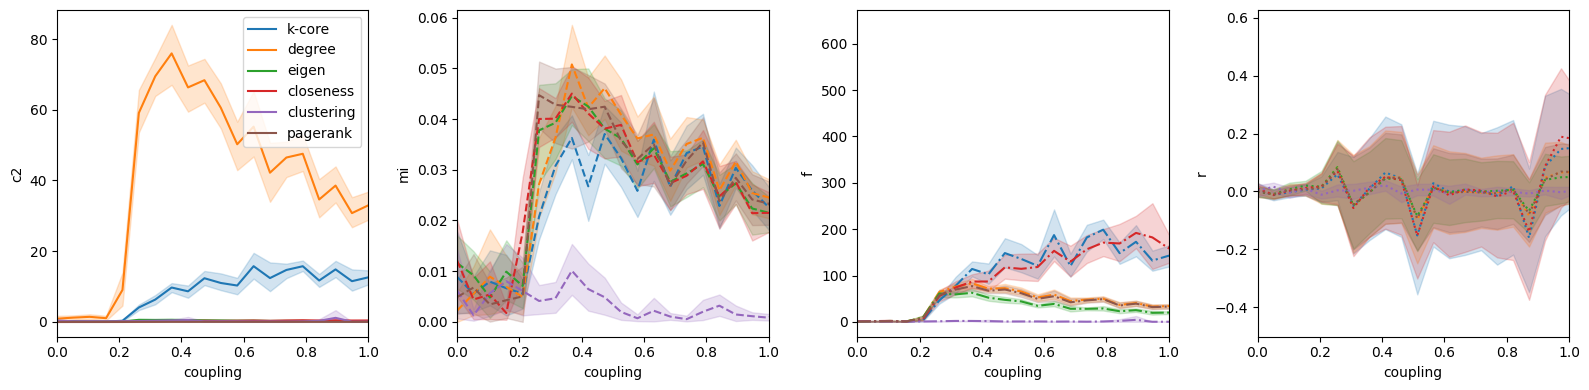

In [153]:
fig ,ax = plt.subplots(1, 4, figsize=(16, 4))

for i, (ls, (k, s)) in enumerate(zip(["-", "--", "-.", "dotted"], scores.items())):
    for m in metrics_names:
        if ls == "-":
            label = m
        else: 
            label=None
        sb.lineplot(scores[k], y=m, x="coupling", label=label, linestyle=ls, ax=ax[i])
    ax[i].set_ylabel(k)
    ax[i].set_xlim([0, 1])
fig.tight_layout()

In [307]:
from sklearn.linear_model import LinearRegression

In [330]:
df = None
J = np.linspace(0, 2, 40)
G = graphinf.random_graph.ErdosRenyiModel(100, 250, with_self_loops=False, with_parallel_edges=False)
num_samples = 50
for j in tqdm.tqdm(J):
    X = graphinf.data_model.dynamics.GlauberDynamics(
        graph_prior=G,
        length=100,
        coupling=j
    )
    out = defaultdict(list)
    for _ in range(num_samples):
        X.sample()
        adj = np.array(X.get_graph().get_adjacency_matrix())
        g = nx.from_numpy_array(adj)
        ts = np.array(X.get_past_states())
        y = ts.mean(-1)
        x = np.array([list(m(g).values()) for m in metrics]).T

        model = LinearRegression()
        model.fit(x, y)
        out["score"].append(model.score(x, y))
        out["coupling"].append(j)
    if df is None:
        df = pd.DataFrame(out)
    else:
        df = pd.concat([df, pd.DataFrame(out)], ignore_index=False)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:26<00:00,  1.53it/s]


Text(0, 0.5, 'Determination coefficient R^2')

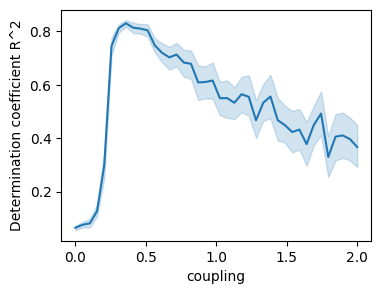

In [331]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sb.lineplot(df, y="score", x="coupling", ax=ax)
plt.ylabel("Determination coefficient R^2")


In [154]:
import eon

ModuleNotFoundError: No module named 'eon'

In [192]:
import graph_tool.all as gt
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import pandas as pd
import networkx as nx
import thresholdmodel
from itertools import product

from scipy.sparse import bsr_matrix, coo_matrix


In [68]:
def threshold_update(adj, s, h=0.4):
    n = adj @ s
    k = adj.sum(0)
    new_s = np.array((n > k * h).astype("int")).squeeze()
#     new_s[s.astype("bool")] = 1
    new_s[s == 1] = 1
#     s[s == 0] = new_s[s == 0]
    return new_s

In [126]:
N = 1000
p = 0.1
adj = nx.to_numpy_array(nx.binomial_tree(int(np.log2(N))))
N = adj.shape[0]
s = np.zeros(N).astype("int")
s[np.random.choice(range(N), replace=False, size=int(0.2 * N))] = 1
st = s * 1
n = 1
while n > 0:
    stp1 = threshold_update(adj, s, h=0.4)
    n = (stp1 - st).sum()
    print(f"t={t}, n(t)={n}, s(t)={st.sum()}")
    st = stp1 * 1
    
    



t=1, n(t)=96, s(t)=102
t=1, n(t)=0, s(t)=198


In [127]:
N = 131_056
M = 10 * N
num_samples = 10

b = np.zeros(N)
b[N//2:] = 1
Q = np.linspace(0, 0.5, 20)
df = None
for q in tqdm.tqdm(Q):
    prob = np.eye(2) * M * (1 - q) + (1 - np.eye(2)) * M * q
    samples = []
    for _ in range(num_samples):
        g = gt.generate_sbm(b, prob)
        edges = g.get_edges()
        adj = coo_matrix((np.ones(edges.shape[0]), (edges[:,0], edges[:,1])), shape=(N, N))
        adj += adj.T
        s0 = (1 - b) * 0.17 * 2
        s0 = (s0 > np.random.randint(2, size=N)).astype("int")
        s = s0 * 1
        n = 1
        while(n != 0):
            new_s = threshold_update(adj, s, h=0.45)
            n = new_s.sum() - s.sum()
            s = new_s * 1
        samples.append((s[b==0].mean(), s[b==1].mean()))
    samples = np.array(samples)
    if df is None:
        df = pd.DataFrame(dict(A=samples[:,0], B=samples[:,1], Q=np.ones(num_samples)*q))
    else:
        df = pd.concat([df, pd.DataFrame(dict(A=samples[:,0], B=samples[:,1], Q=np.ones(num_samples)*q))], ignore_index=True)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:07<00:00,  3.40s/it]


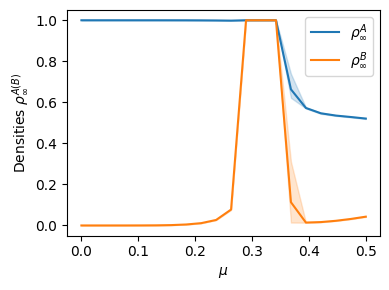

In [129]:
import seaborn as sb

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sb.lineplot(df, y="A", x="Q", ax=ax, label=r"$\rho^A_\infty$")
sb.lineplot(df, y="B", x="Q", ax=ax, label=r"$\rho^B_\infty$")
ax.set_ylabel(r"Densities $\rho^{A(B)}_\infty$")
ax.set_xlabel(r"$\mu$")
fig.tight_layout()
fig.savefig("threshold.png")

In [150]:
q = 0.2
prob = np.eye(2) * (1 - q) + (1 - np.eye(2)) * q
g = gt.generate_sbm(b, M * prob)
s0 = b * 0.17 * 2
s0 = (s0 > np.random.randint(2, size=N)).astype("int")
s0 = g.new_vp("int", vals=s0)

model = gt.BinaryThresholdState(g, h=0.4, s=s0, r=0)


In [164]:
model = gt.BinaryThresholdState(g, h=0.4, s=s0, r=0)

print(model.get_state().a.sum())
model.iterate_sync(1)
print(model.get_state().a.sum())
model.iterate_sync(1)
print(model.get_state().a.sum())
model.iterate_sync(1)
print(model.get_state().a.sum())


2545
2506
2660
2813


In [186]:
def threshold_update(adj, s, h=0.4):
    n = adj @ s
    k = adj.sum(0)
    return np.array((n > k * h).astype("int")).squeeze()

In [189]:
from scipy.sparse import bsr_matrix, coo_matrix
edges = g.get_edges()
adj = coo_matrix((np.ones(edges.shape[0]), (edges[:,0], edges[:,1])))
adj += adj.T

s = s0.a
for i in range(100):
    s = threshold_update(adj, s)
    

2506
2660
2813
3141
3654
4526
5026
5111
5132
5144
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148
5148


In [180]:
adj.sum(0)

(1, 10000)

In [176]:
coo_matrix?


In [261]:
def sbm(b, ers):
    bmax = int(b.max() + 1)
    n = np.array([np.sum(b==i) for i in range(bmax)])
    N = np.eye(bmax) * n * (n - 1)/2. + (1 - np.eye(bmax)) * (n[:, np.newaxis] @ n[np.newaxis, :])
    prob = ers / N
    return nx.stochastic_block_model(n, prob)

In [275]:
model = thresholdmodel.ThreshModel(g, initially_active, 0.4)
model.simulate(save_activated_nodes=True)

(array([0.        , 0.2186411 , 0.22671429, 0.45693398, 0.52705913,
        0.54197167, 0.62609347, 0.83752423, 0.84675044, 1.09626775,
        1.34923115, 1.39145944, 1.73681322, 2.88844484]),
 array([0.167, 0.168, 0.169, 0.17 , 0.171, 0.172, 0.173, 0.174, 0.175,
        0.176, 0.177, 0.178, 0.179, 0.18 ]))

In [279]:
activated = model.activated_nodes[0] + [i[0] for i in model.activated_nodes]

In [281]:
np.array(activated)

array([ 12,  20,  25,  27,  29,  37,  38,  39,  40,  42,  43,  45,  51,
        53,  54,  58,  60,  62,  63,  66,  67,  71,  73,  75,  77,  78,
        83,  86,  87,  88,  90,  95, 100, 101, 103, 106, 109, 112, 113,
       122, 123, 125, 128, 133, 135, 136, 140, 144, 145, 146, 147, 148,
       150, 154, 161, 162, 164, 167, 169, 173, 174, 180, 182, 183, 187,
       188, 189, 191, 194, 197, 199, 202, 207, 210, 214, 219, 220, 221,
       228, 231, 235, 237, 240, 241, 245, 246, 248, 250, 253, 254, 256,
       257, 258, 263, 264, 265, 269, 270, 277, 281, 282, 284, 287, 289,
       294, 301, 304, 305, 307, 308, 309, 312, 325, 326, 330, 331, 333,
       335, 337, 340, 344, 348, 355, 360, 364, 374, 375, 378, 380, 382,
       383, 384, 393, 394, 396, 397, 403, 407, 409, 410, 415, 418, 424,
       429, 435, 436, 438, 446, 448, 451, 453, 454, 456, 460, 462, 464,
       468, 471, 473, 474, 476, 477, 482, 488, 489, 494, 498,  12, 859,
       388, 531, 779, 963, 519, 903, 956, 817, 954, 442, 986, 89

In [291]:
N = 10000
M = 10 * N
b = np.zeros(N)
b[int(0.5*N):] = 1
Q = np.linspace(0, 0.5, 20)
p0 = 0.17
num_samples = 20

y = None
for q in Q:
    print(q)
    samples= []
    for _ in range(num_samples):
        ers = np.array([[(1-q) / 2, q], [q, (1-q)/2]]) * M
        g = sbm(b, ers)

        x0 = (np.random.rand(N) < 2 * p0).astype('int')
        x0[b==1] = 0
        initially_active = np.where(x0)[0]
        model = thresholdmodel.ThreshModel(g, initially_active, 0.4)
        times, cascade_size = model.simulate(save_activated_nodes=True)
        activated = np.zeros(N)
        activated[model.activated_nodes[0] + [i[0] for i in model.activated_nodes]] = 1
        samples.append([activated[b == i].sum() / (b==i).sum() for i in np.unique(b)])
    samples = np.array(samples)
    _y = pd.DataFrame(dict(cascade_size_A=samples[:,0], cascade_size_B=samples[:,1], Q=q))
    if y is None:
        y = _y
    else:
        y = pd.concat([y, _y], ignore_index=True)


0.0
0.02631578947368421
0.05263157894736842
0.07894736842105263
0.10526315789473684
0.13157894736842105
0.15789473684210525
0.18421052631578946
0.21052631578947367
0.23684210526315788
0.2631578947368421
0.2894736842105263
0.3157894736842105
0.3421052631578947
0.3684210526315789
0.39473684210526316
0.42105263157894735
0.4473684210526315
0.47368421052631576
0.5


In [ ]:
import codyn

Text(0.5, 0, 'Modularity parameter $Q$')

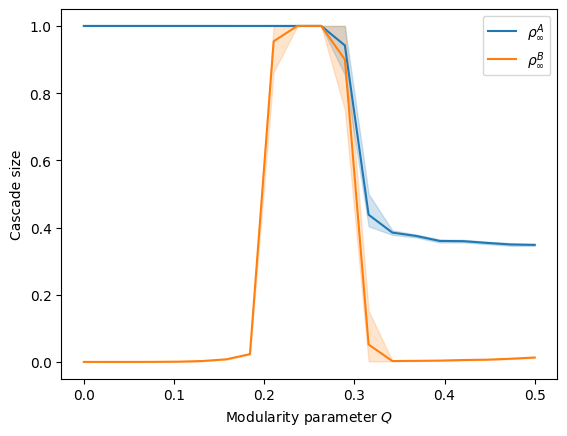

In [294]:
sb.lineplot(y, y="cascade_size_A", x="Q", label=r"$\rho^A_\infty$")
sb.lineplot(y, y="cascade_size_B", x="Q", label=r"$\rho^B_\infty$")
plt.ylabel("Cascade size")
plt.xlabel("Modularity parameter $Q$")


In [223]:
bmax = int(b.max() + 1)
n = np.array([np.sum(b==i) for i in range(bmax)])

edges = np.zeros((bmax, )*2)
for i, j in product(range(bmax), repeat=2):
    mask = np.zeros((N, N))
    ibegin = n[i-1] if i > 0 else 0
    iend = n[i] if i < len(n) - 1 else None
    
    jbegin = n[j-1] if j > 0 else 0
    jend = n[j] if j < len(n) - 1 else None
    mask[ibegin:iend, jbegin:jend] = 1
    np.fill_diagonal(mask, 0)
    edges[i, j] = np.sum(adj * mask)
edges = np.eye(bmax) * edges / 2 + (1 - np.eye(bmax)) * edges



In [224]:
edges, ers

(array([[399., 206.],
        [206., 402.]]),
 array([[400., 200.],
        [200., 400.]]))

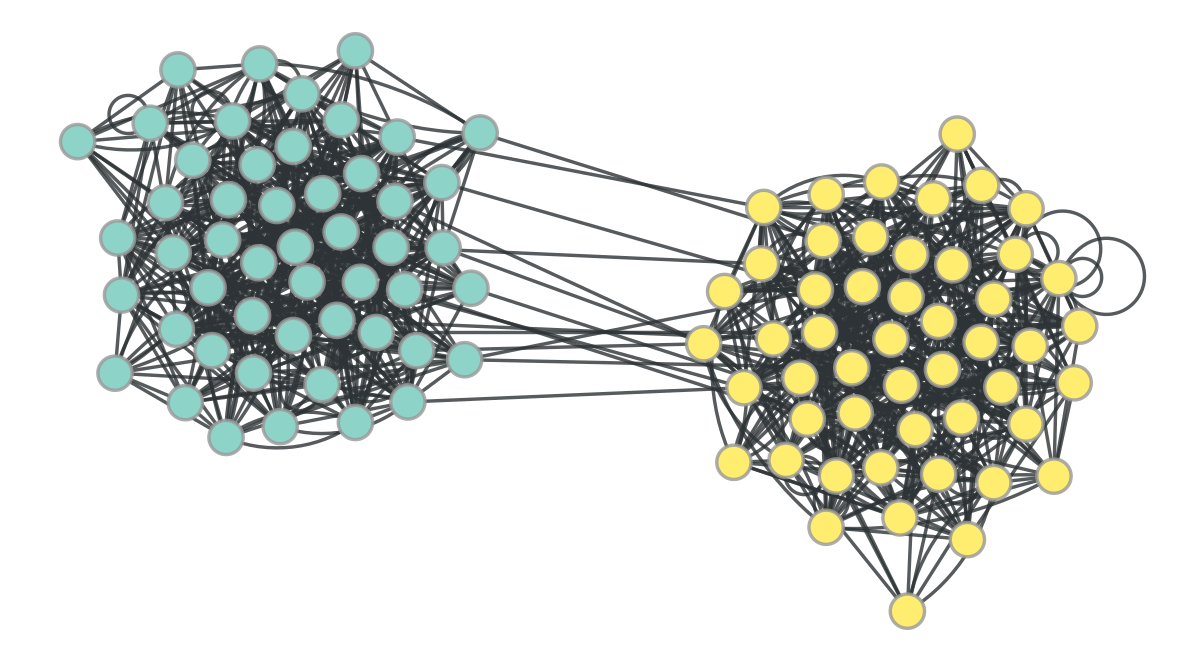

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x288b5d570, at 0x28b8cc7c0>

In [88]:
c = g.new_vp("int", vals=b)
gt.graph_draw(g, vertex_fill_color=c)


In [132]:
nx.stochastic_block_model?